Use this to discard all changes and reset 

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
ls

sample_data/


In [ ]:
#!kill -9 -1

Uncomment all 'deb-src' lines to allow apt to download source code for dependencies

In [2]:
with open('/etc/apt/sources.list') as f:
  txt = f.read()
with open('/etc/apt/sources.list.backup', 'w') as f:
  f.write(txt)
with open('/etc/apt/sources.list', 'w') as f:
  f.write(txt.replace('# deb-src','deb-src'))

Update apt 

Install dependencies for Caffe with CUDA

Install g++-5: this is a way to make g++, nvcc and boost work together

In [3]:
!apt update
!apt build-dep caffe-cpu
!apt install g++-5

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://archive.canonical.com/ubuntu bionic InRelease [10.2 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:1

Download sources for boost

Unpack boost

In [4]:
!wget https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
!tar --bzip2 -xf boost_1_67_0.tar.bz2

--2020-12-20 04:15:21--  https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
Resolving dl.bintray.com (dl.bintray.com)... 35.161.162.245, 54.187.208.114, 54.187.219.235, ...
Connecting to dl.bintray.com (dl.bintray.com)|35.161.162.245|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://d29vzk4ow07wi7.cloudfront.net/2684c972994ee57fc5632e03bf044746f6eb45d4920c343937a465fd67a5adba?response-content-disposition=attachment%3Bfilename%3D%22boost_1_67_0.tar.bz2%22&Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6Imh0dHAqOi8vZDI5dnprNG93MDd3aTcuY2xvdWRmcm9udC5uZXQvMjY4NGM5NzI5OTRlZTU3ZmM1NjMyZTAzYmYwNDQ3NDZmNmViNDVkNDkyMGMzNDM5MzdhNDY1ZmQ2N2E1YWRiYT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0JmaWxlbmFtZSUzRCUyMmJvb3N0XzFfNjdfMC50YXIuYnoyJTIyIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjA4NDM4NDQxfSwiSXBBZGRyZXNzIjp7IkFXUzpTb3VyY2VJcCI6IjAuMC4wLjAvMCJ9fX1dfQ__&Signature=XqekQGPQkSqzC5fjQ8sfz462KjSevjSYZOKCATV0IZyUQeZ

Set g++-5 and gcc-5 as default compiles: we're gonna use them to compile both boost and Caffe 

In [5]:
!update-alternatives --remove-all gcc 
!update-alternatives --remove-all g++

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20

!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc

!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

update-alternatives: error: no alternatives for gcc
update-alternatives: error: no alternatives for g++
update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


Compile and install boost

In [6]:
!cd boost_1_67_0 && ./bootstrap.sh --exec-prefix=/usr/local --with-libraries=system,filesystem,regex,thread,python \
--with-python-version=2.7 --with-python-root=/usr
!cd boost_1_67_0 && ./b2 install

Streaming output truncated to the last 5000 lines.
common.copy /usr/local/include/boost/spirit/repository/include/qi_distinct.hpp
common.copy /usr/local/include/boost/spirit/repository/include/qi_directive.hpp
common.copy /usr/local/include/boost/spirit/repository/include/qi_confix.hpp
common.copy /usr/local/include/boost/spirit/repository/include/qi_advance.hpp
common.copy /usr/local/include/boost/spirit/repository/include/qi.hpp
common.copy /usr/local/include/boost/spirit/repository/include/karma_subrule.hpp
common.copy /usr/local/include/boost/spirit/repository/include/karma_nonterminal.hpp
common.copy /usr/local/include/boost/spirit/repository/include/karma_directive.hpp
common.copy /usr/local/include/boost/spirit/repository/include/karma_confix.hpp
common.copy /usr/local/include/boost/spirit/repository/include/karma.hpp
common.copy /usr/local/include/boost/spirit/repository/home/qi.hpp
common.copy /usr/local/include/boost/spirit/repository/home/karma.hpp
common.copy /usr/local/inc

Clone Caffe from github, checkout SSD branch

In [7]:
!git clone https://github.com/weiliu89/caffe.git && cd caffe && git checkout ssd

Cloning into 'caffe'...
remote: Enumerating objects: 30179, done.
remote: Total 30179 (delta 0), reused 0 (delta 0), pack-reused 30179
Receiving objects: 100% (30179/30179), 48.27 MiB | 24.30 MiB/s, done.
Resolving deltas: 100% (19451/19451), done.
Branch 'ssd' set up to track remote branch 'ssd' from 'origin'.
Switched to a new branch 'ssd'


Configure makefile:

- Set path to CUDA
- Set BLAS option
- Set opencv version 3
- Add Python layer (just in case)
- Add some unrecognized paths to hdf5 and numpy

In [8]:
with open('caffe/Makefile.config.example') as f:
  config = f.read()
  
comment = ['CUDA_DIR := /usr/local/cuda', 
           'BLAS := open']
uncomment = ['# CUDA_DIR := /usr', 
             '# BLAS := atlas', 
             '# OPENCV_VERSION := 3', '# WITH_PYTHON_LAYER := 1'] #
replace = [('INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include',
            'INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include /usr/include/hdf5/serial /usr/local/lib/python2.7/dist-packages/numpy/core/include/'), 
           ('LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib',
            'LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib /usr/lib/x86_64-linux-gnu/hdf5/serial')]

for c in uncomment:
  config = config.replace(c, c[2:])
for c in comment:
  config = config.replace(c, '# '+c)
for c1,c2 in replace:
  config = config.replace(c1, c2)
  
with open('caffe/Makefile.config', 'w') as f:
  f.write(config)

Replace '-isystem' in Makefile by '-I' to prevent errors with locating stdlib: adopted from https://github.com/Martchus/tageditor/issues/22

In [9]:
with open('caffe/Makefile') as f:
  mfile = f.read()
  
with open('caffe/Makefile.backup', 'w') as f:
  f.write(mfile)
  
with open('caffe/Makefile', 'w') as f:
  f.write(mfile.replace('-isystem','-I'))

Magic thing to avoid errors with nan-related types: adopted from 

https://stackoverflow.com/questions/47200632/caffe-installation-gcc-error-namespace-std-has-no-member-isnan

In [10]:
with open('/usr/include/x86_64-linux-gnu/c++/5/bits/c++config.h') as f:
  txt = f.read()
with open('/usr/include/x86_64-linux-gnu/c++/5/bits/c++config.h', 'w') as f:
  f.write(txt.replace('/* #undef _GLIBCXX_USE_C99_MATH */',
                      '/* #undef _GLIBCXX_USE_C99_MATH */\n#define  _GLIBCXX_USE_C99_MATH  1'))

Now actually make Caffe, python interface and tests

In [13]:
!cd caffe && make all -j4 && make pycaffe && make test -j8 && make distribute

CXX .build_release/src/caffe/proto/caffe.pb.cc
CXX src/caffe/solvers/sgd_solver.cpp
CXX src/caffe/solvers/nesterov_solver.cpp
CXX src/caffe/parallel.cpp
CXX src/caffe/solvers/rmsprop_solver.cpp
CXX src/caffe/solvers/adagrad_solver.cpp
CXX src/caffe/solvers/adadelta_solver.cpp
CXX src/caffe/solvers/adam_solver.cpp
CXX src/caffe/layer.cpp
CXX src/caffe/solver.cpp
CXX src/caffe/util/im_transforms.cpp
CXX src/caffe/util/upgrade_proto.cpp
CXX src/caffe/util/sampler.cpp
CXX src/caffe/util/im2col.cpp
CXX src/caffe/util/math_functions.cpp
CXX src/caffe/util/benchmark.cpp
CXX src/caffe/util/db_leveldb.cpp
CXX src/caffe/util/io.cpp
CXX src/caffe/util/insert_splits.cpp
CXX src/caffe/util/db_lmdb.cpp
CXX src/caffe/util/hdf5.cpp
CXX src/caffe/util/signal_handler.cpp
CXX src/caffe/util/bbox_util.cpp
CXX src/caffe/util/db.cpp
CXX src/caffe/util/blocking_queue.cpp
CXX src/caffe/util/cudnn.cpp
CXX src/caffe/layer_factory.cpp
CXX src/caffe/internal_thread.cpp
CXX src/caffe/data_transformer.cpp
CXX src/c

Add path with installed libs (namely boost and caffe) to configs

In [15]:
!echo /usr/local/lib >> /etc/ld.so.conf && ldconfig
!echo /content/caffe/distribute/lib >> /etc/ld.so.conf && ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
ls

sample_data/


We are ready to test Caffe!

In [16]:
ls

boost_1_67_0/  boost_1_67_0.tar.bz2  caffe/  sample_data/


In [74]:
!python RippedImageRepair.py

: cannot connect to X server 


In [21]:
cd dip_color

/content/dip_color


In [19]:
cd 'drive/My Drive/dip_color'

[Errno 2] No such file or directory: 'drive/My Drive/dip_color'
/content


In [ ]:
!cp -r caffe /content/drive/MyDrive/Content_for_colab

cp: cannot stat 'caffe': No such file or directory


In [78]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color
from sklearn.cluster import KMeans
import os
from scipy.ndimage.interpolation import zoom
sys.path.insert(0, "/content/caffe/python")
import caffe




caffe.set_mode_cpu()
net = caffe.Net("proto.prototxt", "model.caffemodel", caffe.TEST)
# im = cv2.cvtColor(cv2.imread("/stone.jpg", 1), cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(cv2.imread("/didi.png", 1), cv2.COLOR_BGR2RGB)
img_rgb_fullres = im.copy()
Xfullres = img_rgb_fullres.shape[0]
Yfullres = img_rgb_fullres.shape[1]
img_lab_fullres = color.rgb2lab(img_rgb_fullres).transpose((2, 0, 1))
img_l_fullres = img_lab_fullres[[0], :, :]
img_ab_fullres = img_lab_fullres[1:, :, :]
im = cv2.resize(im, (256, 256))
img_rgb = im.copy()
img_lab = color.rgb2lab(img_rgb).transpose((2, 0, 1))
img_l = img_lab[[0], :, :]
img_ab =img_lab[1:, :, :]
img_lab_mc = img_lab / np.array((1., 1., 1.))[:, np.newaxis, np.newaxis]-np.array((50./ 1., 0./ 1.,0./1.))[:, np.newaxis, np.newaxis]
img_l_mc =img_lab_mc[[0], :, :]
 


input_mask = np.zeros((1,256,256)) 
input_ab = np.zeros((2,256,256)) 
input_ab_mc = (input_ab - 0.)/ 1.
input_mask_mult = input_mask*110.



net_input_prepped = np.concatenate((img_l_mc, input_ab_mc, input_mask_mult), axis=0)
net.blobs['data_l_ab_mask'].data[...] = net_input_prepped
net.forward()


{'pred_ab': array([[[[ 1.4615625e-01, -3.3762738e-01, -2.7438593e-01, ...,
           -3.9577448e-01, -3.6004114e-01, -2.7269468e-01],
          [-2.5743470e-01, -5.4820955e-01, -4.6471786e-01, ...,
           -6.3396108e-01, -7.3609138e-01, -4.4525886e-01],
          [-1.7051317e-01, -7.0326155e-01, -3.2434702e-01, ...,
           -4.9160862e-01, -6.8649703e-01, -5.2663291e-01],
          ...,
          [ 1.9813370e+00,  2.1425333e+00,  1.1920146e+00, ...,
            2.5983543e+00,  2.3367357e+00,  2.3020732e+00],
          [ 1.8094536e+00,  1.5976373e+00,  1.1975416e+00, ...,
            2.6448667e+00,  2.2631259e+00,  2.5153997e+00],
          [ 9.9957955e-01,  1.4598293e+00,  1.5111696e+00, ...,
            1.8324239e+00,  1.4607500e+00,  1.7482308e+00]],
 
         [[-6.9283628e-01, -5.6492662e-01, -5.5069691e-01, ...,
           -1.1835605e-01, -7.1657434e-02, -4.0945005e-01],
          [ 1.8067917e-01, -4.4015929e-01, -6.0807854e-01, ...,
           -3.9046049e-01, -4.4693017e-

In [79]:
def lab2rgb_transpose(img_l, img_ab):
    pred_lab = np.concatenate((img_l, img_ab), axis=0).transpose((1, 2, 0))
    pred_rgb = (np.clip(color.lab2rgb(pred_lab), 0, 1) * 255).astype('uint8')
    return pred_rgb


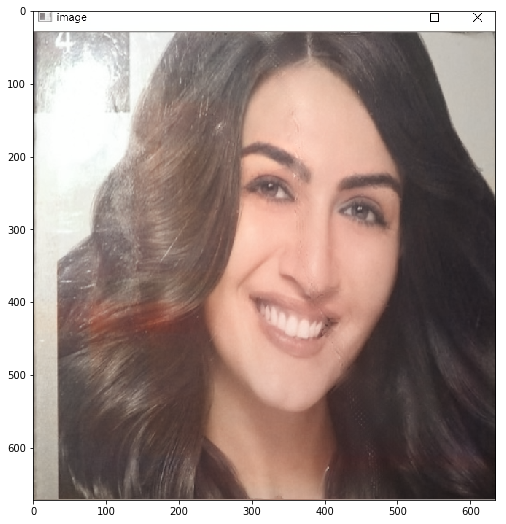

In [80]:
pred_lab = np.concatenate((img_l, net.blobs['pred_ab'].data[0, :, :, :]), axis=0).transpose((1, 2, 0))
output_rgb = (np.clip(color.lab2rgb(pred_lab), 0, 1) * 255).astype('uint8')

output_lab = color.rgb2lab(output_rgb).transpose((2, 0, 1))
output_ab = output_lab[1:, :, :]

zoom_factor = (1, 1.*img_l_fullres.shape[1] /output_ab.shape[1], 1. *img_l_fullres.shape[2]/output_ab.shape[2])
output_ab_fullres = zoom(output_ab, zoom_factor, order=1)

img_out_fullres= lab2rgb_transpose(img_l_fullres, output_ab_fullres)


plt.figure(figsize=(21,9))
plt.imshow(img_out_fullres)